# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.019409e+01     7.355115e+00
 * time: 0.0029268264770507812
     1     2.820211e+01     4.114525e+00
 * time: 0.013305902481079102
     2     1.928699e+01     5.264620e+00
 * time: 0.026373863220214844
     3     1.293222e+01     3.490647e+00
 * time: 0.039196014404296875
     4     1.222002e+01     3.503830e+00
 * time: 0.04973483085632324
     5     1.154006e+01     2.084074e+00
 * time: 0.06017899513244629
     6     1.012717e+01     1.518185e+00
 * time: 0.07063484191894531
     7     9.101027e+00     9.362742e-01
 * time: 0.0812528133392334
     8     8.670248e+00     7.381616e-01
 * time: 0.09207296371459961
     9     8.521498e+00     5.480660e-01
 * time: 0.10288596153259277
    10     8.457849e+00     5.829214e-01
 * time: 0.11136102676391602
    11     8.392084e+00     6.428925e-01
 * time: 0.11983895301818848
    12     8.330141e+00     4.024558e-01
 * time: 0.13107681274414062
    13     8.265469e+00     6.353541e-01
 * t

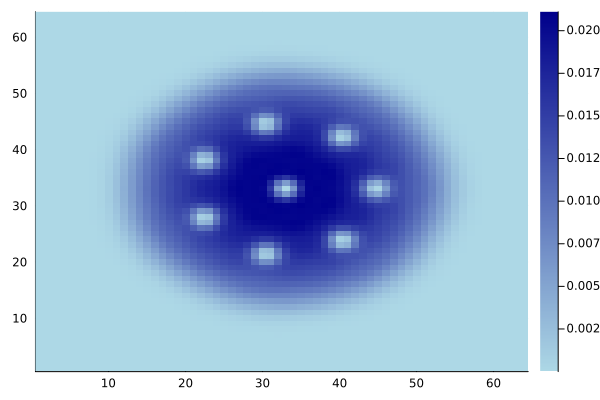

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)